In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv('C:/Users/ANKIT PC/Desktop/learning intrvention(classification)/old_faithful_geyser_data.csv')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [76]:
df.shape

(272, 2)

In [77]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

df_scaled=df.apply(zscore)
df_scaled.head()

,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


### we need to find optimal k and  scree plot

In [78]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
    clusters.fit(df_scaled) ##take that clusters on scaled dataset
    labels=clusters.labels_ ## k values
    centroids= clusters.cluster_centers_ ##within that hat is centriod
    cluster_errors.append(clusters.inertia_) ##within cluster sum f squares
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]    ##calaculating errors. by default eudidian distance

,num_clusters,cluster_errors
0,1,544.000000
1,2,79.575959
2,3,56.313618
3,4,43.909179
4,5,34.274379
5,6,27.313682
6,7,23.814904
7,8,20.811311
8,9,18.586327
9,10,17.025442


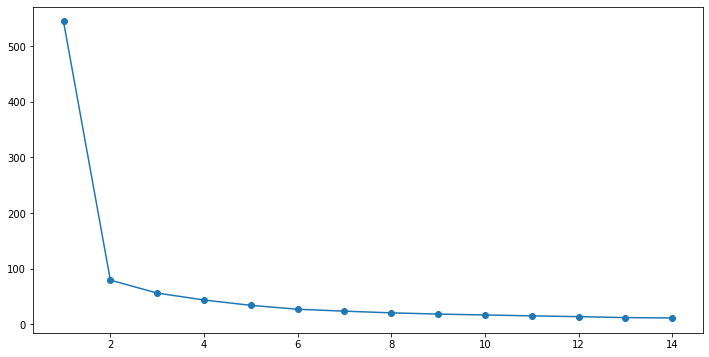

In [79]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [80]:
K_mean=KMeans(n_clusters=2,n_init=15,random_state=123)
K_mean.fit(df_scaled)
centroids=K_mean.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

In [81]:
K_mean.labels_

df_labels=pd.DataFrame(K_mean.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [82]:
df_labeled=df.join(df_labels)
df_labeled.head()

,eruptions,waiting,labels
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1


In [83]:
##displaying cluster for 0 
df_labeled[df_labeled.labels==0]

,eruptions,waiting,labels
1,1.800,54,0
3,2.283,62,0
5,2.883,55,0
8,1.950,51,0
10,1.833,54,0
13,1.750,47,0
15,2.167,52,0
16,1.750,62,0
18,1.600,52,0
20,1.800,51,0


In [84]:

df_labeled[df_labeled.labels==1]

,eruptions,waiting,labels
0,3.600,79,1
2,3.333,74,1
4,4.533,85,1
6,4.700,88,1
7,3.600,85,1
9,4.350,85,1
11,3.917,84,1
12,4.200,78,1
14,4.700,83,1
17,4.800,84,1


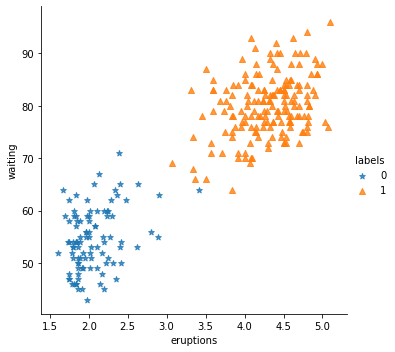

In [88]:
markers=['*','^']
sns.lmplot('eruptions','waiting',data=df_labeled,hue='labels',fit_reg=False,markers=markers)
plt.show()